In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('score_updated.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [3]:
# Ambil data ke variabel x dan y
# Pastikan nama kolom di file Excel kamu benar 'Hours' dan 'Scores'
# Jika error "KeyError", cek nama kolom dengan print(df.columns)
x = df['Hours'].values
y = df['Scores'].values

# Tampilkan 5 data pertama untuk memastikan data terbaca
print("Data X (Jam Belajar):", x[:5])
print("Data Y (Nilai Ujian):", y[:5])

Data X (Jam Belajar): [2.5 5.1 3.2 8.5 3.5]
Data Y (Nilai Ujian): [21 47 27 75 30]


In [6]:
# Menghitung rata-rata (mean) secara manual
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

print(f"Rata-rata Jam Belajar (Mean X): {mean_x}")
print(f"Rata-rata Nilai (Mean Y): {mean_y}")

Rata-rata Jam Belajar (Mean X): 5.267708333333333
Rata-rata Nilai (Mean Y): 54.020833333333336


In [16]:
pembilang = np.sum((x - mean_x) * (y - mean_y))
penyebut = np.sum((x - mean_x) ** 2)

m = pembilang / penyebut
c = mean_y - (m * mean_x)

print(f"Slope (m) ditemukan: {m}")
print(f"Intercept (c) ditemukan: {c}")
print(f"Persamaan Garis: y = {c:.2f} + {m:.2f}x")

Slope (m) ditemukan: 9.901318259246045
Intercept (c) ditemukan: 1.8635766281174497
Persamaan Garis: y = 1.86 + 9.90x


In [17]:
# Membuat prediksi untuk seluruh data X
# Karena x adalah array numpy, kita bisa langsung kalikan tanpa loop
y_pred = c + (m * x)

print("Prediksi untuk 5 data pertama:", y_pred[:5])

Prediksi untuk 5 data pertama: [26.61687228 52.36029975 33.54779506 86.02478183 36.51819054]


In [22]:
# --- MENGHITUNG ERROR METRICS SECARA MANUAL ---

# 1. Mean Absolute Error (MAE) Rata-rata selisih mutlak (absolut) antara nilai asli (y) dan prediksi (y_pred)
mae = np.mean(np.abs(y - y_pred))

# 2. Mean Squared Error (MSE) Rata-rata kuadrat selisih (memberikan hukuman lebih besar jika errornya jauh)
mse = np.mean((y - y_pred) ** 2)

# 3. Root Mean Squared Error (RMSE)
# Akar kuadrat dari MSE (agar satuannya kembali sama dengan nilai asli/skor)
rmse = np.sqrt(mse)

# 4. R-Squared (R2 Score) Menunjukkan seberapa baik garis regresi mewakili data (Mendekati 1 = Sempurna, < 0 = Buruk)
ss_total = np.sum((y - mean_y) ** 2)      # Variasi total data asli
ss_residual = np.sum((y - y_pred) ** 2)   # Variasi error model
r2_score = 1 - (ss_residual / ss_total)

print("Hasil Evaluasi Model")
print(f"MAE (Rata-rata Error Mutlak): {mae:.4f}")
print(f"MSE (Rata-rata Error Kuadrat): {mse:.4f}")
print(f"RMSE (Akar Error Kuadrat): {rmse:.4f}")
print(f"R² Score (Akurasi Garis): {r2_score:.4f}")

Hasil Evaluasi Model
MAE (Rata-rata Error Mutlak): 2.6041
MSE (Rata-rata Error Kuadrat): 11.5402
RMSE (Akar Error Kuadrat): 3.3971
R² Score (Akurasi Garis): 0.9814


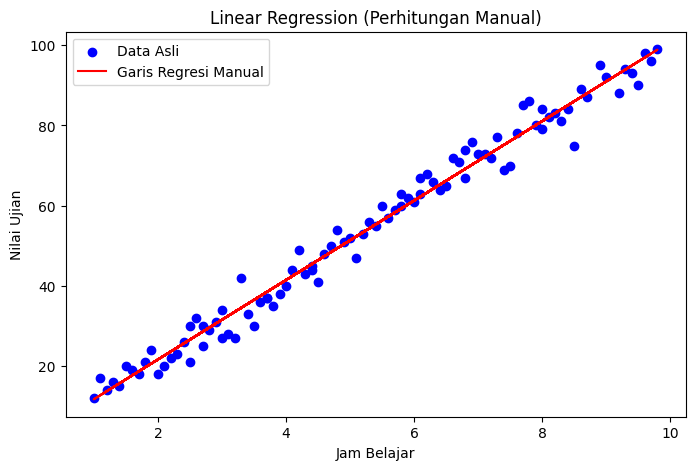

In [9]:
plt.figure(figsize=(8, 5))

# Plot data asli (titik biru)
plt.scatter(x, y, color='blue', label='Data Asli')

# Plot garis regresi hasil manual (garis merah)
plt.plot(x, y_pred, color='red', label='Garis Regresi Manual')

plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Linear Regression (Perhitungan Manual)')
plt.legend()
plt.show()

In [10]:
jam_belajar = 10
prediksi_nilai = c + (m * jam_belajar)

print(
    f"Jika belajar {jam_belajar} jam, prediksi nilainya adalah: {prediksi_nilai:.2f}")

Jika belajar 10 jam, prediksi nilainya adalah: 100.88


In [21]:
# Tes prediksi manual
jam_input = 2
prediksi_baru = c + (m * jam_input)

print(
    f"Jika siswa belajar {jam_input} jam, prediksi nilainya adalah: {prediksi_baru:.2f}")

Jika siswa belajar 2 jam, prediksi nilainya adalah: 21.67
